In [1]:
import pyusbus
 
import numpy as np 
import matplotlib.pyplot as plt

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

# Initialize the probe

In [11]:
probe = pyusbus.Convex();

'WlpaWgAAAAAAAAAAGAAQAAUEEQAKBRIAAP8TAAAIFAABCRUAAA0WAA8OFwAwDxgAIBAZAAYRGgAIEhsAARQcAAAVHQADFh4AAxgfAFUZIAAFGiEAVRsiAAUcIwAAISQAASIlAEYrJgAALCcAAC0oAAH/KQACAACQCQAAcAAAA6ACAASgQAAGoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKWlpaU=
'WlpaWgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

# Read a few frames and creates the loop

In [12]:
probe.getImages(n=1)

[]

In [13]:
probe.createLoop()

[]

# Creating the images and a gif

In [15]:
filenames = []
plt.figure(figsize=(10,10))
for k in range(len(probe.loop)):
    LOOP = probe.loop[k].copy()
    for j in range(len(LOOP)):
        LOOP[j] = LOOP[j] - np.average(LOOP[j])
    plt.imshow(np.sqrt(np.abs(LOOP.reshape((80, 3900)))).T,aspect="auto",cmap="bone")
    plt.title("Image "+str(k)+ " in the loop")

    filename = f'images/20210401_{k}.png'
    #plt.savefig(filename)
    filenames.append(filename)

<Figure size 720x720 with 0 Axes>

# What does the RF look like

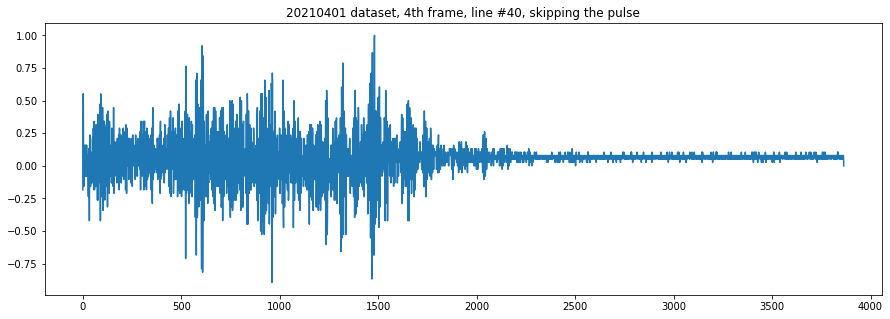

In [76]:
plt.figure(figsize=(15,5))
plt.plot(probe.loop[4][40][35:]/np.max(probe.loop[4][40][35:]))
plt.title("20210401 dataset, 4th frame, line #40, skipping the pulse")
plt.savefig('images/20210401_detail.png')

# Assembling the gif

In [77]:
import imageio

with imageio.get_writer('images/20210401.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

![](images/20210401.gif)


In [18]:
np.savez("data/20210401_loop.npz", loop=probe.loop)

In [68]:
loop = probe.loop[1].copy()
for k in range(len(loop)):
    loop[k] = loop[k] - np.average(loop[k])
loop = np.array(loop)

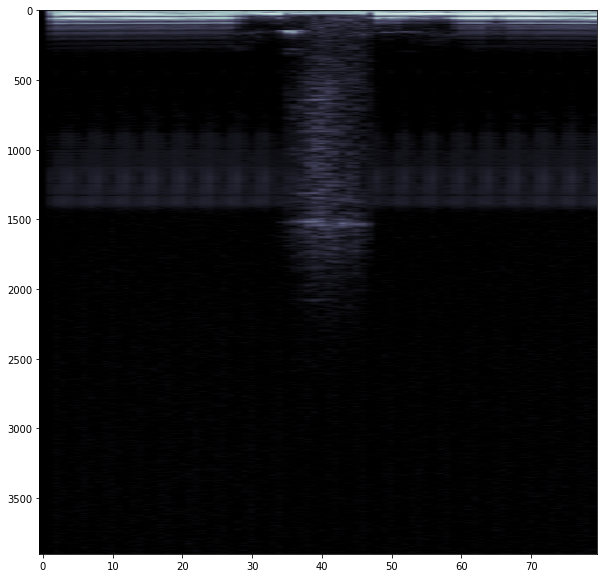

In [71]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.sqrt(np.abs(loop.reshape((80, 3900)))//(256)).T,aspect="auto",cmap="bone")

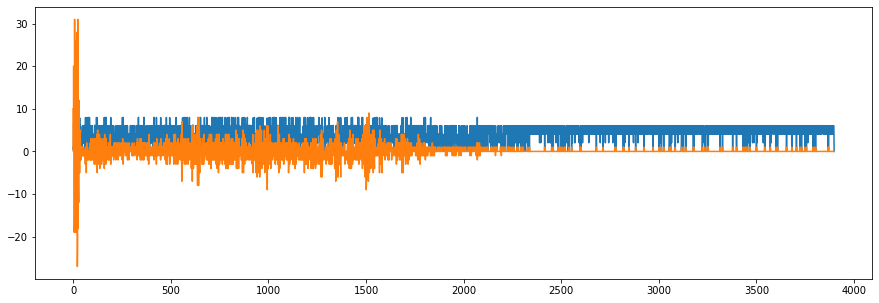

In [72]:
plt.figure(figsize=(15,5))

plt.plot((probe.loop[4][40][1:] - 256*4*(probe.loop[4][40][1:]//(256)//4))/(256/2))
plt.plot(probe.loop[4][40][1:]//(256)//4)

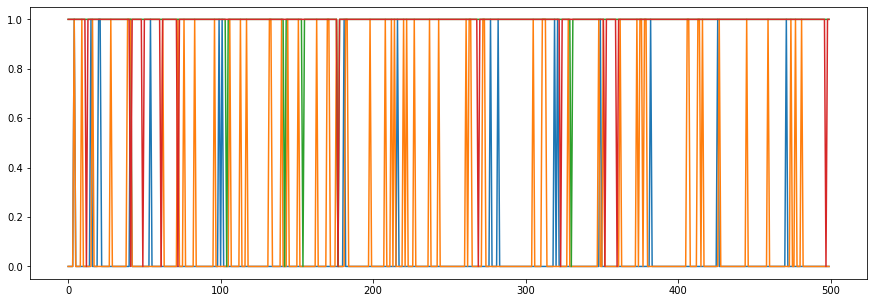

In [73]:
plt.figure(figsize=(15,5))
plt.plot(probe.loop[4][40][2500:3000]//(256)//4)
plt.plot(probe.loop[4][41][2500:3000]//(256)//4)
plt.plot(probe.loop[4][42][2500:3000]//(256)//4)
plt.plot(probe.loop[4][43][2500:3000]//(256)//4)

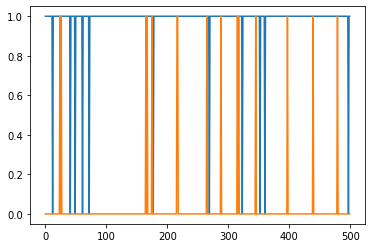

In [74]:
plt.plot(probe.loop[4][43][2500:3000]//(256)//4)
plt.plot(probe.loop[4][44][2500:3000]//(256)//4)